In [1]:
import os
import time

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
from hamiltonian import Hamiltonian
from rgf import GreensFunction
from utils import smart_inverse
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
ham = Hamiltonian("one_d_wire")
gf = GreensFunction(ham)

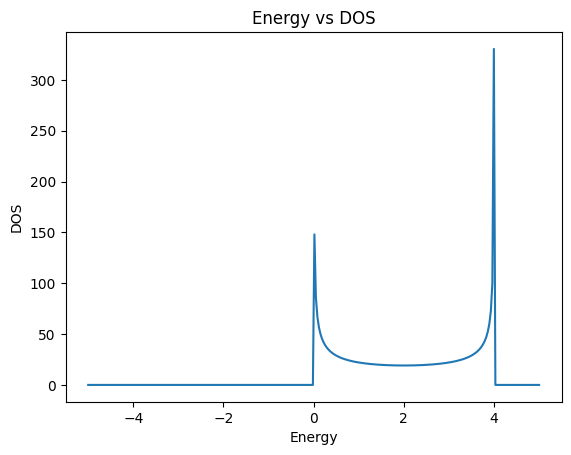

In [2]:
ham = Hamiltonian("one_d_wire")
gf = GreensFunction(ham)


energy = np.linspace(-5,5, 300)
dos = gf.calculate_DOS()


plt.plot(energy, dos)
plt.ylabel('DOS')
plt.xlabel('Energy')
plt.title('Energy vs DOS')

plt.show()

In [3]:
ham.potential = None
ham.mu1=0.1
ham.mu2=0.1

In [4]:
X = ham.create_hamiltonian(False)

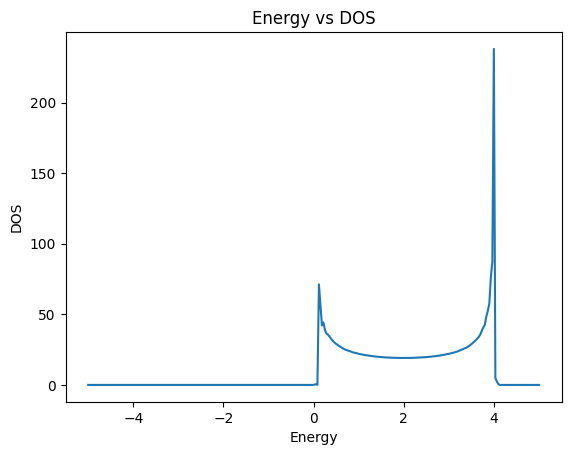

In [5]:
energy = np.linspace(-5,5, 300)
dos = gf.calculate_DOS()


plt.plot(energy, dos)
plt.ylabel('DOS')
plt.xlabel('Energy')
plt.title('Energy vs DOS')

plt.show()

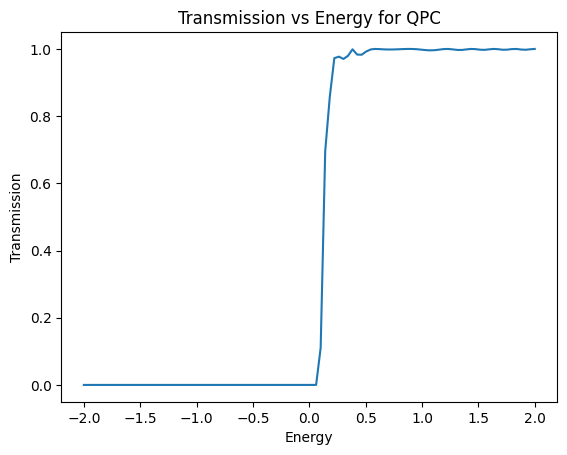

In [6]:
energies = np.linspace(-2, 2, 100)
transmission = []
for E in energies:
    transmission.append(gf.compute_transmission(E=E))

plt.plot(energies, transmission)
plt.xlabel('Energy')
plt.ylabel('Transmission')
plt.title('Transmission vs Energy for QPC')
plt.show()

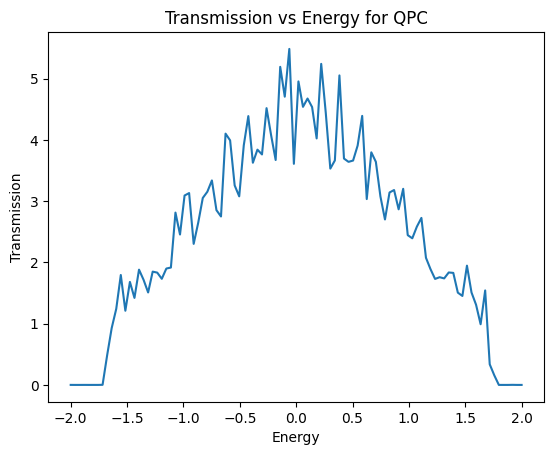

In [7]:
# Sweep Fermi energy and plot transmission for QPC
ham = Hamiltonian("qpc")

ham.W = 10
ham.L = 30
ham.t = 1.0
ham.o = 0.0
ham.Vg = .1  # Moderate barrier

gf = GreensFunction(ham)

energies = np.linspace(-2, 2, 100)
transmission = []
for E in energies:
    transmission.append(gf.compute_transmission(E=E))

plt.plot(energies, transmission)
plt.xlabel('Energy')
plt.ylabel('Transmission')
plt.title('Transmission vs Energy for QPC')
plt.show()

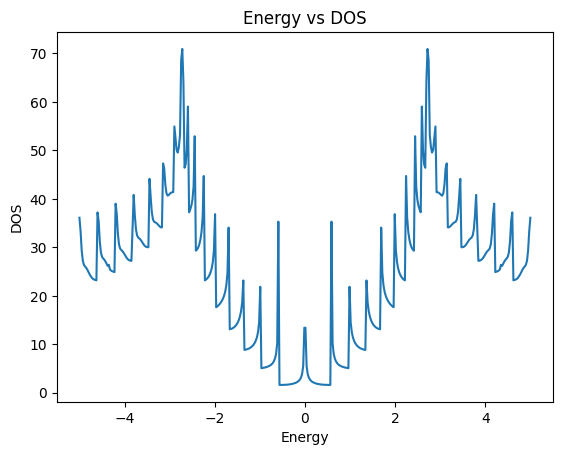

In [2]:
import os
import time

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
from hamiltonian import Hamiltonian
from rgf import GreensFunction
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
energy = np.linspace(-5,5, 400)

ham = Hamiltonian("zigzag", periodic=False)
ham.mu1 = 0
ham.mu2 = 0
ham.Nx = 50
ham.Ef = 0
#ham.set_params(10, 3)

gf = GreensFunction(ham, energy_grid=energy)




dos = gf.calculate_DOS()
plt.plot(energy, dos)
plt.ylabel('DOS')
plt.xlabel('Energy')
plt.title('Energy vs DOS')

plt.show()



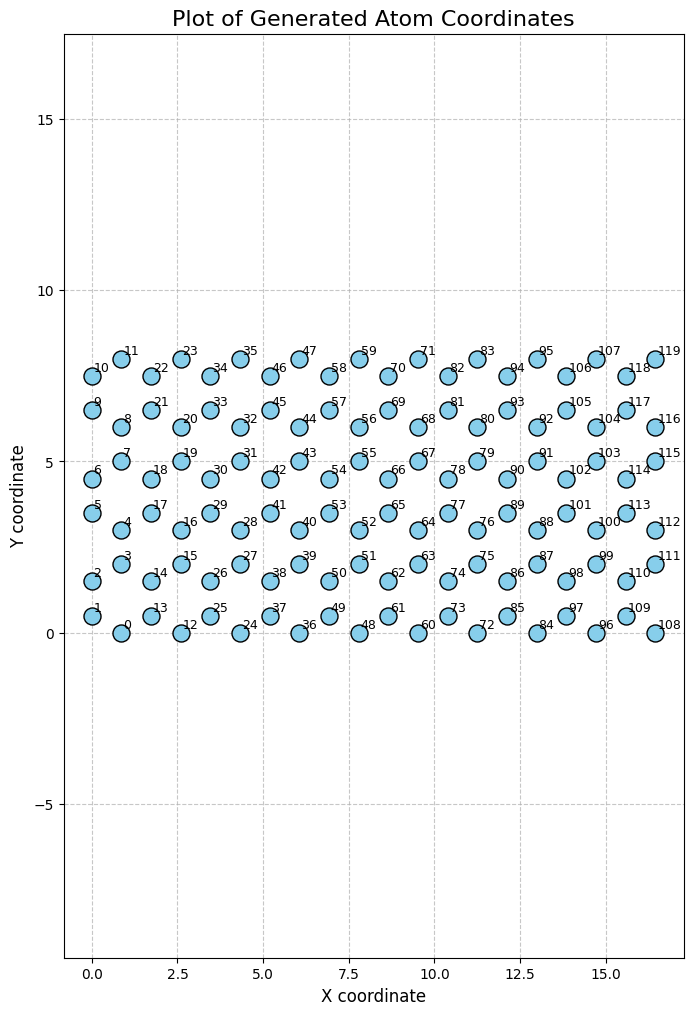

In [9]:


# --- Plotting Code ---
structure = ham.unit_cell.structure

# Extract x and y coordinates from the list of Atom objects
x_coords = [atom.x for atom in structure]
y_coords = [atom.y for atom in structure]

# Create the plot
plt.figure(figsize=(8, 12))
plt.scatter(x_coords, y_coords, s=150, edgecolors='black', facecolors='skyblue', zorder=5)

# Add text labels to identify each atom's index in the list
for i, (x, y) in enumerate(zip(x_coords, y_coords)):
    plt.text(x + 0.05, y + 0.05, str(i), fontsize=9, ha='left', va='bottom', zorder=10)

# Formatting the plot for clarity
plt.title("Plot of Generated Atom Coordinates", fontsize=16)
plt.xlabel("X coordinate", fontsize=12)
plt.ylabel("Y coordinate", fontsize=12)
plt.axis('equal')  # This is CRUCIAL for correctly visualizing geometric structures

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [13]:
import os
import time

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
from hamiltonian import Hamiltonian
from rgf import GreensFunction
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt


ham = Hamiltonian("zigzag", True)
energy = np.linspace(-5,5, 401)
ham.reset_voltages()
ham.set_params(10, 3)

gf = GreensFunction(ham, energy_grid=energy)


H00, H01, H10 = ham.get_H00_H01_H10()
X = gf.lead_self_energy.self_energy("left", -2.45819398)
# energy = np.linspace(-5,5, 300)
dos = gf.calculate_DOS()

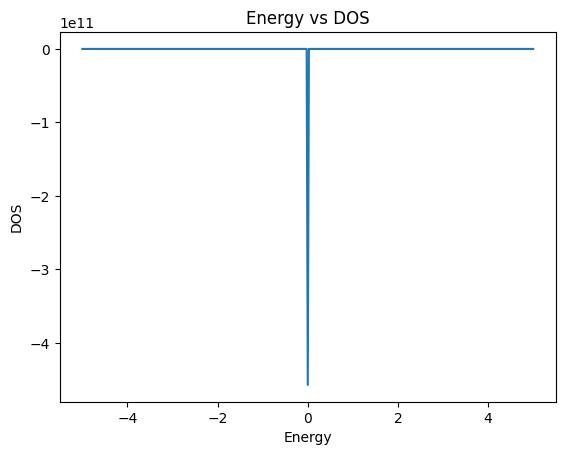

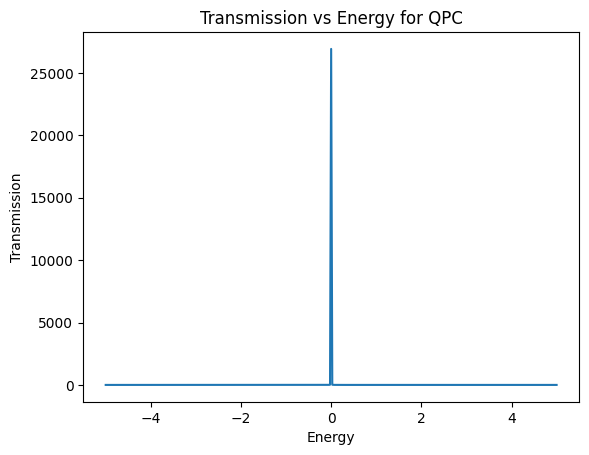

In [ ]:

plt.plot(energy, dos)
plt.ylabel('DOS')
plt.xlabel('Energy')
plt.title('Energy vs DOS')

plt.show()


transmission = []
for E in energy:
    transmission.append(gf.compute_transmission(E=E))

plt.plot(energy, transmission)
plt.xlabel('Energy')
plt.ylabel('Transmission')
plt.title('Transmission vs Energy for QPC')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def run_transport_simulation():
    """
    Translates and runs a MATLAB script for calculating quantum transport
    properties using the Non-Equilibrium Green's Function (NEGF) method.
    """
    # --- Constants (all MKS, except energy which is in eV) ---
    hbar = 1.0545718e-34  # Corrected hbar value
    q = 1.60217662e-19
    m0 = 9.10938356e-31
    m_eff = 0.25 * m0  # Effective mass
    
    # This constant combines q^2 / (2*pi*hbar)
    # The original MATLAB code had a typo IE=(q*q)/(2*pi*hbar) which is G0/pi
    # The quantum of conductance is G0 = 2*q^2/h = q^2/(pi*hbar)
    IE = q**2 / (np.pi * hbar) 

    Ef = 0.1  # Fermi energy in eV
    kT = 0.025 # Thermal energy in eV

    # --- Inputs ---
    a = 3e-10  # Lattice spacing in meters
    # Hopping parameter in eV
    t0 = 1#hbar**2 / (2 * m_eff * a**2 * q) 

    # Device structure: Number of sites in Source, Channel, Drain
    # This corresponds to the Resonant Tunneling (RT) barrier case in the MATLAB script
    NS = 15
    NC = 16
    ND = 15
    Np = NS + NC + ND # Total number of points

    # --- Hamiltonian Matrix ---
    # Define the potential barrier UB
    # This setup creates two small barriers, simulating a resonant tunneling diode
    UB = np.zeros(Np)
    UB[NS : NS+4] = 0.4 * 0  # First barrier
    # The middle part from NS+4 to NS+NC-4 is zero
    UB[NS+NC-4 : NS+NC] = 0.4 * 0# Second barrier
    
    # Create the tight-binding Hamiltonian matrix T
    # Main diagonal
    main_diag = 2 * t0 * np.ones(Np)
    # Off-diagonals for nearest-neighbor hopping
    off_diag = -t0 * np.ones(Np - 1)
    
    T = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
    print(T)
    # Add the potential barrier to the Hamiltonian
    T = T + np.diag(UB)

    # --- Bias ---
    V = 0.0  # Applied bias in Volts
    mu1 = Ef + (V / 2)  # Chemical potential of the source
    mu2 = Ef - (V / 2)  # Chemical potential of the drain

    # Applied potential profile U1 due to bias
    # It drops linearly across the channel region
    U1 = np.concatenate([
        (V / 2) * np.ones(NS),
        np.linspace(V / 2, -V / 2, NC),
        (-V / 2) * np.ones(ND)
    ])

    # --- Energy Grid for Green’s function method ---
    NE = 501  # Number of energy points
    E = np.linspace(-0.2, 0.8, NE)
    dE = E[1] - E[0]
    zplus = 1j * 1e-12  # Small imaginary part for Green's functions

    # Fermi-Dirac distribution functions for source and drain
    f1 = 1 / (1 + np.exp((E - mu1) / kT))
    f2 = 1 / (1 + np.exp((E - mu2) / kT))

    # --- Main Loop for Transmission and Current Calculation ---
    I = 0.0  # Initialize current
    TM = np.zeros(NE) # Array to store transmission values

    print("Starting NEGF calculation...")
    for k in range(NE):
        Ek = E[k]
        
        # --- Self-Energies (sig1, sig2) ---
        # Self-energy for the source contact (left lead)
        # It's a non-zero matrix element only at the (0,0) position
        ck1 = 1 - (Ek + zplus - U1[0] - UB[0]) / (2 * t0)
        # Ensure the argument for arccos is within the valid range [-1, 1]
        # to avoid NaN results from small numerical errors
        if (Ek==.2):
            print(ck1)
        ck1 = np.clip(ck1, -1, 1) 
        ka1 = np.arccos(ck1)
        
        sig1 = np.zeros((Np, Np), dtype=complex)
        sig1[0, 0] = -t0 * np.exp(1j * ka1)
        if (Ek==.2):
            print(ck1)
            print(sig1[0,0])

        # Self-energy for the drain contact (right lead)
        # It's a non-zero matrix element only at the (Np-1, Np-1) position
        ck2 = 1 - (Ek + zplus - U1[-1] - UB[-1]) / (2 * t0)
        ck2 = np.clip(ck2, -1, 1)
        ka2 = np.arccos(ck2)

        sig2 = np.zeros((Np, Np), dtype=complex)
        sig2[Np - 1, Np - 1] = -t0 * np.exp(1j * ka2)
        
        
        # --- Broadening Matrices (gam1, gam2) ---
        gam1 = 1j * (sig1 - sig1.conj().T)
        gam2 = 1j * (sig2 - sig2.conj().T)
       
            

        # --- Green's Function (G) ---
        # G = inv( (E+iδ)I - H - Σ1 - Σ2 )
        # H is the device Hamiltonian (T + diag(U1))
        # Σ are the self-energies
        mat_to_invert = ((Ek + zplus) * np.eye(Np)) - T - np.diag(U1) - sig1 - sig2
        G = np.linalg.inv(mat_to_invert)

        # --- Transmission (TM) ---
        # TM(E) = Tr(Γ1 * G * Γ2 * G†)
        # G.conj().T is the conjugate transpose (dagger) of G
        TM[k] = np.real(np.trace(gam1 @ G @ gam2 @ G.conj().T))
        if (Ek == 0):
            print(np.real(np.trace(gam1 @ G @ gam2 @ G.conj().T)))
        
        # --- Current Calculation (Landauer-Büttiker formula) ---
        I += (dE * IE * TM[k] * (f1[k] - f2[k]))

    print(f"Calculation finished.")
    print(f"Total Current I = {I * 1e6:.4f} uA")

    # --- Plotting Results ---
    plt.figure(figsize=(12, 6))

    # Plot Transmission vs. Energy
    plt.subplot(1, 2, 1)
    plt.plot(E, TM, 'b', linewidth=2)
    plt.xlabel('Energy (eV)')
    plt.ylabel('Transmission T(E)')
    plt.title(f'Transmission Spectrum at V = {V} V')
    plt.grid(True)
    
    # Plot Potential Profile
    plt.subplot(1, 2, 2)
    sites = np.arange(Np) * a * 1e9 # Site position in nm
    plt.plot(sites, UB + U1, 'r-', label='Total Potential (U_B + U_1)', linewidth=2)
    plt.plot(sites, U1, 'g--', label='Applied Potential (U_1)', linewidth=1.5)
    plt.xlabel('Position (nm)')
    plt.ylabel('Potential (eV)')
    plt.title('Device Potential Profile')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# --- Run the simulation ---
if __name__ == '__main__':
    run_transport_simulation()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data Preparation ---
# I've extracted the voltage and current data you provided for each device.

# 1. Ballistic Device Data
v_ballistic = np.array([0.000, 0.020, 0.040, 0.060, 0.080, 0.100, 0.120, 0.140, 0.160, 0.180, 0.200, 0.220, 0.240, 0.260, 0.280, 0.300, 0.320, 0.340, 0.360, 0.380, 0.400, 0.420, 0.440, 0.460, 0.480, 0.500])
i_ballistic = np.array([0.0000, 0.4336, 0.7167, 0.8001, 0.8389, 0.8840, 0.8965, 0.8771, 0.8654, 0.8625, 0.8537, 0.8431, 0.8386, 0.8326, 0.8159, 0.7984, 0.7952, 0.8018, 0.8006, 0.7798, 0.7542, 0.7473, 0.7582, 0.7696, 0.7614, 0.7310])

# 2. Tunneling Device Data
v_tunneling = np.array([0.000, 0.020, 0.040, 0.060, 0.080, 0.100, 0.120, 0.140, 0.160, 0.180, 0.200, 0.220, 0.240, 0.260, 0.280, 0.300, 0.320, 0.340, 0.360, 0.380, 0.400, 0.420, 0.440, 0.460, 0.480, 0.500])
i_tunneling = np.array([0.0000, 0.0218, 0.0418, 0.0599, 0.0742, 0.0816, 0.0827, 0.0832, 0.0873, 0.0960, 0.1092, 0.1260, 0.1455, 0.1637, 0.1802, 0.1931, 0.2023, 0.2094, 0.2170, 0.2273, 0.2415, 0.2604, 0.2839, 0.3115, 0.3420, 0.3733])

# 3. Resonant Tunneling Device Data
v_resonant = np.array([0.000, 0.020, 0.040, 0.060, 0.080, 0.100, 0.120, 0.140, 0.160, 0.180, 0.200, 0.220, 0.240, 0.260, 0.280, 0.300, 0.320, 0.340, 0.360, 0.380, 0.400, 0.420, 0.440, 0.460, 0.480, 0.500])
i_resonant = np.array([0.0000, 0.0018, 0.0039, 0.0480, 0.0105, 0.0148, 0.0214, 0.0306, 0.0422, 0.0552, 0.0689, 0.0831, 0.0983, 0.1142, 0.1292, 0.1381, 0.1274, 0.0814, 0.0461, 0.0317, 0.0263, 0.0249, 0.0257, 0.0284, 0.0314, 0.0328])


# --- Plotting Setup ---
# We will create a figure with 3 subplots, one for each device.
# Using a nice style for the plots.
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(3, 1, figsize=(8, 18)) # 3 rows, 1 column

# --- Plot 1: Ballistic Device ---
axs[0].plot(v_ballistic, i_ballistic, marker='o', linestyle='-', color='b', markersize=4)
axs[0].set_title('I-V Characteristics: Ballistic Device', fontsize=14)
axs[0].set_xlabel('Voltage (V)', fontsize=12)
axs[0].set_ylabel('Current (μA)', fontsize=12)
axs[0].set_xlim(0, 0.5)
axs[0].set_ylim(0, max(i_ballistic) * 1.1) # Add 10% padding to y-axis

# --- Plot 2: Tunneling Device ---
axs[1].plot(v_tunneling, i_tunneling, marker='s', linestyle='-', color='g', markersize=4)
axs[1].set_title('I-V Characteristics: Tunneling Device', fontsize=14)
axs[1].set_xlabel('Voltage (V)', fontsize=12)
axs[1].set_ylabel('Current (μA)', fontsize=12)
axs[1].set_xlim(0, 0.5)
axs[1].set_ylim(0, max(i_tunneling) * 1.1)

# --- Plot 3: Resonant Tunneling Device ---
axs[2].plot(v_resonant, i_resonant, marker='^', linestyle='-', color='r', markersize=4)
axs[2].set_title('I-V Characteristics: Resonant Tunneling Device', fontsize=14)
axs[2].set_xlabel('Voltage (V)', fontsize=12)
axs[2].set_ylabel('Current (μA)', fontsize=12)
axs[2].set_xlim(0, 0.5)
axs[2].set_ylim(0, max(i_resonant) * 1.1)

# --- Final Touches ---
# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(pad=3.0)

# Display the plots
plt.show()


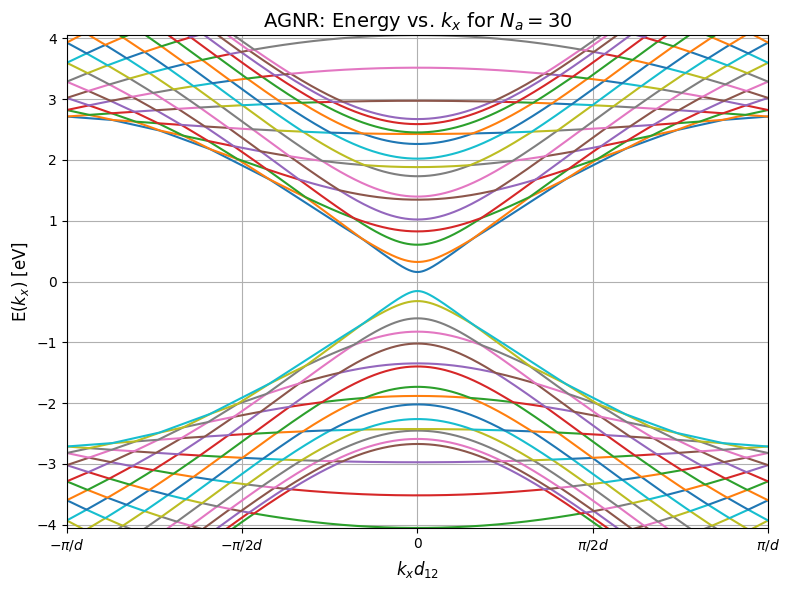

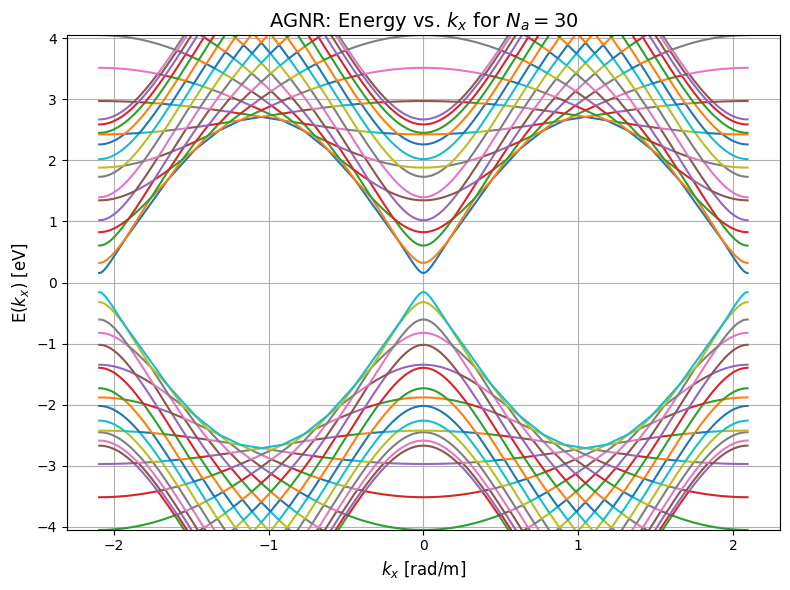

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix, bmat
from scipy.linalg import eigh

# =============================================================================
# 1. Constants and Parameters
# =============================================================================
h_cut = 1
eV = 1
Armst = 1

t_eV = 2.7
a0_A0 = 1

t = t_eV * eV
a0 = a0_A0 * Armst
a = 3 * a0 / 2
d12 = 2 * a


na = 30 
n = na - 2
d = 6 + (n - 1) * 2  

sn_list = [list(range(6)), list(range(1, 6)) + [0]]
tn_list = [[4], [1]]

for m in range(2, n + 1):
    nm_start = 6 + (m - 2) * 2
    nm = np.arange(nm_start, nm_start + 2)
    
    if m == 2:
        c1 = 3  
    else:
        c1 = nm[0] - 1
        

    sn_list[0].extend([nm[0], c1])
    sn_list[1].extend([nm[1], nm[0]])
    
    if m == 2:
        tn_list[0].append(nm[1])
        tn_list[1].append(2)
    else:
        tn_list[0].append(nm[1])
        tn_list[1].append(nm[0] - 2)

# Convert lists to NumPy arrays
sn = np.array(sn_list)
tn = np.array(tn_list)

# =============================================================================
# 3. Functions to Build Hamiltonians (Periodic and Finite)
# =============================================================================

def get_periodic_hamiltonian(k, H_diag_block, H_offdiag_block, d12_m):
    """
    Constructs the k-dependent Hamiltonian H(k) for the periodic system.
    H(k) = H0 + t*exp(ikd) + t_dagger*exp(-ikd)
    """
    # Apply phase factors from Bloch's Theorem to the coupling matrices
    t_k = H_offdiag_block * np.exp(1j * k * d12_m)
    t_k_dagger = H_offdiag_block.T * np.exp(-1j * k * d12_m)
    
    # Sum the blocks to get the full k-dependent Hamiltonian
    hk = H_diag_block + t_k + t_k_dagger
    return hk

def get_finite_block_hamiltonian(num_layers, H_diag_block, H_offdiag_block):
    """
    Constructs the full Hamiltonian for a FINITE ribbon from its blocks.
    This Hamiltonian is for a finite-size system and does NOT depend on 'k'.
    """
    # Create the block structure using a list of lists for bmat
    block_layout = []
    for i in range(num_layers):
        row = [None] * num_layers
        row[i] = H_diag_block
        if i > 0:
            row[i-1] = H_offdiag_block.T
        if i < num_layers - 1:
            row[i+1] = H_offdiag_block
        block_layout.append(row)
    
    # Assemble the full block-tridiagonal matrix using bmat
    full_H = bmat(block_layout, format='csc')
    return full_H

# --- Create the fundamental Hamiltonian blocks ---
# H0: The Hamiltonian of one unit cell (on-site energy)
H0 = csc_matrix((-t * np.ones(sn.shape[1]), (sn[0, :], sn[1, :])), shape=(d, d))
H0 = H0 + H0.T

# t_block: The coupling matrix between adjacent unit cells
t_block = csc_matrix((-t * np.ones(tn.shape[1]), (tn[0, :], tn[1, :])), shape=(d, d))

# =============================================================================
# 4. Function to Calculate Band Structure (Periodic System)
# =============================================================================
def calculate_bands(kv, H0_block, t_block, d12_m, d_atoms):
    """
    Calculates energy eigenvalues for the INFINITE, PERIODIC AGNR by solving
    the eigenvalue problem for H(k) at each k.
    """
    Ev = np.zeros((d_atoms, len(kv)))

    for m, k in enumerate(kv):
        # Get the k-dependent Hamiltonian for this momentum value
        hk = get_periodic_hamiltonian(k, H0_block, t_block, d12_m)
        
        # Find the eigenvalues (energy levels) of H(k)
        egv = eigh(hk.toarray(), eigvals_only=True)
        Ev[:, m] = egv
        
    return Ev

# =============================================================================
# 5. First Calculation and Plot (Periodic)
# =============================================================================
res = 1000
kv1 = np.linspace(-np.pi / d12, np.pi / d12, res)
# Call calculate_bands with the block matrices
Ev1 = calculate_bands(kv1, H0, t_block, d12, d)

plt.figure(figsize=(8, 6))
plt.plot(kv1 * d12, (Ev1 / eV).T, linewidth=1.5)
plt.xlabel(r'$k_x d_{12}$', fontsize=12)
plt.ylabel('E($k_x$) [eV]', fontsize=12)
plt.title(f'AGNR: Energy vs. $k_x$ for $N_a={na}$', fontsize=14)
plt.xticks(
    ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
    labels=[r'$-\pi/d$', r'$-\pi/2d$', '0', r'$\pi/2d$', r'$\pi/d$']
)
plt.xlim(-np.pi, np.pi)
plt.ylim(-t_eV * 1.5, t_eV * 1.5)
plt.grid(True)
plt.tight_layout()

# =============================================================================
# 6. Second Calculation and Plot (Periodic)
# =============================================================================
res = 1000
kv2 = np.linspace(-np.pi / a, np.pi / a, res)
# Call calculate_bands with the block matrices
Ev2 = calculate_bands(kv2, H0, t_block, d12, d)

plt.figure(figsize=(8, 6))
plt.plot(kv2, (Ev2 / eV).T, linewidth=1.5)
plt.xlabel(r'$k_x$ [rad/m]', fontsize=12)
plt.ylabel('E($k_x$) [eV]', fontsize=12)
plt.title(f'AGNR: Energy vs. $k_x$ for $N_a={na}$', fontsize=14)
plt.ylim(-t_eV * 1.5, t_eV * 1.5)
plt.grid(True)
plt.tight_layout()

# =============================================================================
# 7. Show Plots
# =============================================================================
plt.show()


In [ ]:
sn_list = [[0,1,2,3,4,5], [1,2,4,0,5,3]]
tn_list = [[2], [3]]    
k=0.3
hk =get_periodic_hamiltonian(k, H0, t_block, d12).toarray()

In [57]:
hk[3,:]

array([ 0.0000e+00+0.j,  0.0000e+00+0.j, -4.3254e-19+0.j,  0.0000e+00+0.j,
       -4.3254e-19+0.j,  0.0000e+00+0.j, -4.3254e-19+0.j,  0.0000e+00+0.j,
        0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        0.0000e+00+0.j,  

Calculating band structure...
Calculation complete.


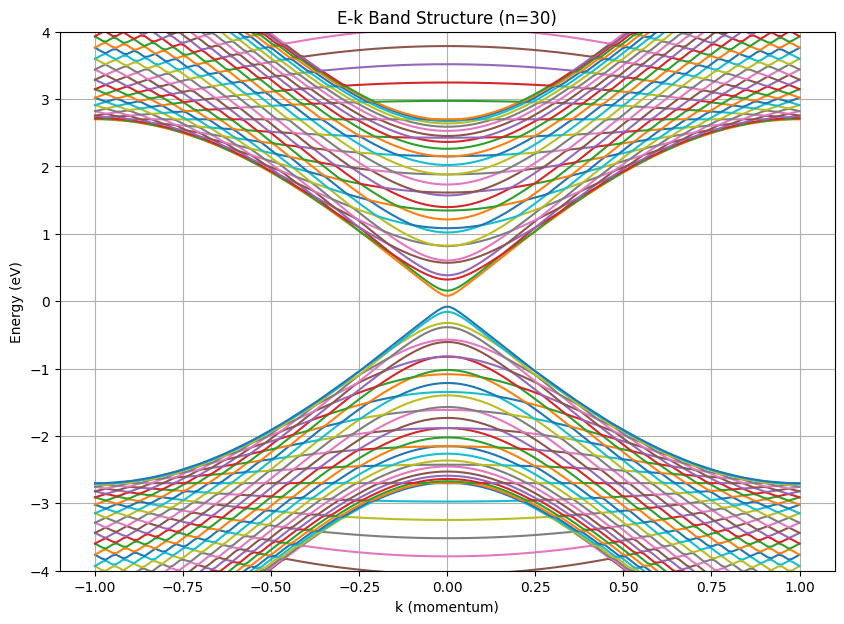

In [7]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

# --- Parameters ---
n = 30
t = -2.7
num_atoms = 4 * n + 2

# =============================================================================
# 1. Function to Create the Armchair Hamiltonian
# =============================================================================
def create_armchair_hamiltonian(n, t):
    """
    Constructs the on-site (H) and coupling (T0) Hamiltonian matrices
    for an armchair graphene nanoribbon unit cell directly.
    
    Returns:
        (sp.csc_matrix, sp.csc_matrix): A tuple containing H and T0.
    """
    num_atoms = 4 * n + 2
    
    # Use lists to collect the coordinates and data for the sparse matrices
    H_rows = []
    H_cols = []

    # Loop through each atom to determine its neighbors
    for i in range(num_atoms):
        neighbors = []
        # This condition identifies the "bulk" atoms away from the four corners
        # and also not on the specific vertical edges defined by the modulo checks.
        if (i != 0 and i != 1 and i != 4 * n and i != (4*n + 1) and ((i-2) % 4) != 0 and (i - 3) % 4 != 0):
            if (i % 2 == 0):
                neighbors = [i - 1, i + 1, i + 3]
            else:
                neighbors = [i - 3, i + 1, i - 1]
        # This block handles all the edge and corner atoms
        else:
            if (i == 0):
                neighbors = [1, 3]
            elif (i == 1):
                neighbors = [0, 2]
            elif (i == 4 * n):
                neighbors = [4*n + 1, 4 * n - 1]
            elif (i == 4 * n + 1):
                neighbors = [4 * n, 4 * n - 2]
            elif ((i - 2) % 4 == 0):
                neighbors = [i - 1, i + 3]
            elif ((i - 3) % 4 == 0):
                neighbors = [i - 3, i + 1]
            else:
                print(f"Unhandled case for atom index: {i}")
                raise ValueError("wrong amount")
        
        # Add connections to the list for each valid neighbor
        for neighbor in neighbors:
            if 0 <= neighbor < num_atoms:
                H_rows.append(i)
                H_cols.append(neighbor)

    # Create the sparse H matrix
    H_data = np.full(len(H_rows), t, dtype=float)
    H = sp.coo_matrix((H_data, (H_rows, H_cols)), shape=(num_atoms, num_atoms)).tocsc()

    # --- T0: Coupling matrix between unit cells ---
    T0_rows = [4 * i - 2 for i in range(1, n + 1)]
    T0_cols = [4 * i - 1 for i in range(1, n + 1)]
    T0_data = np.full(n, t, dtype=float)
    T0 = sp.coo_matrix((T0_data, (T0_rows, T0_cols)), shape=(num_atoms, num_atoms)).tocsc()
    
    return H, T0

# =============================================================================
# 2. Build the Hamiltonian and Calculate Eigenvalues
# =============================================================================

# Create the Hamiltonian matrices by calling the new function
H, T0 = create_armchair_hamiltonian(n, t)

def get_eig(k):
    """Calculates energy eigenvalues for a given k-vector."""
    # Construct the effective k-dependent Hamiltonian using sparse matrices
    H_eff = H + T0 * np.exp(np.pi * k * 1j) + T0.conj().T * np.exp(-np.pi * k * 1j)
    
    # Use the sparse eigensolver for Hermitian matrices.
    energy = eigsh(H_eff, k=num_atoms-2, which='SA', return_eigenvectors=False)
    return sorted(energy)

# =============================================================================
# 3. Calculate and Plot the E-k Relationship (Band Structure)
# =============================================================================

# Define the range of k-vectors to calculate over (the first Brillouin zone)
k_vals = np.linspace(-1, 1, 200)
all_energies = []

# Loop through each k-vector and calculate the energy eigenvalues
print("Calculating band structure...")
for k_val in k_vals:
    energies = get_eig(k_val)
    all_energies.append(energies)
print("Calculation complete.")

# Convert the list of energies to a 2D NumPy array for easy plotting
# Transpose the array so that each column is a band
all_energies = np.array(all_energies).T

# Create the plot
plt.figure(figsize=(10, 7))
for band_index in range(all_energies.shape[0]):
    plt.plot(k_vals, all_energies[band_index, :])

# Add labels and title for clarity
plt.xlabel('k (momentum)')
plt.ylabel('Energy (eV)')
plt.ylim((-4, 4))
plt.title(f'E-k Band Structure (n={n})')
plt.grid(True)
plt.show()


Starting parallel calculation of eigenvalues...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 112 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0520s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   7 out of 150 | elapsed:    0.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  23 out of 150 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  39 out of 150 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  55 out of 150 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  71 out of 150 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  87 out of 150 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 103 out of 150 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 119 out of 150 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished



Eigenvalue sweep finished in 0.27 s
DOS computed.


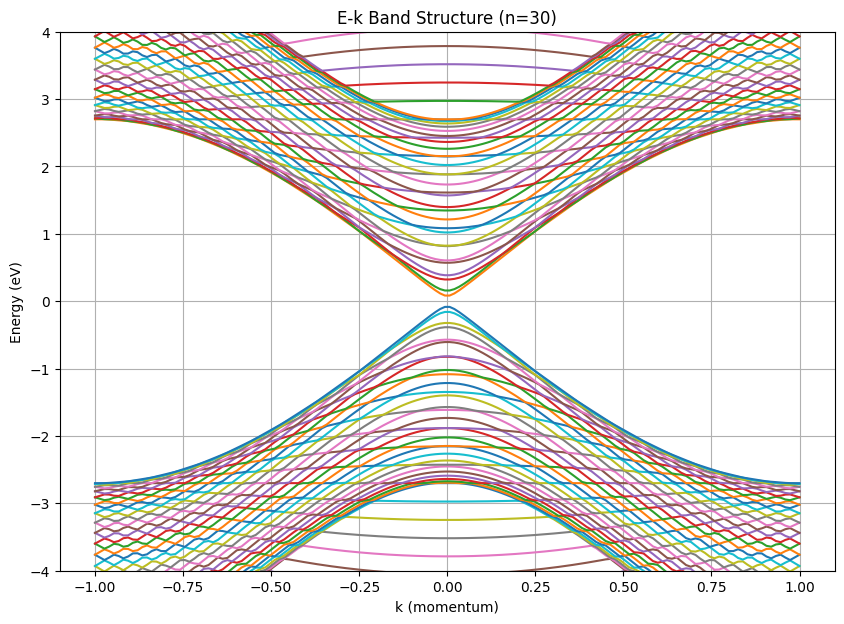

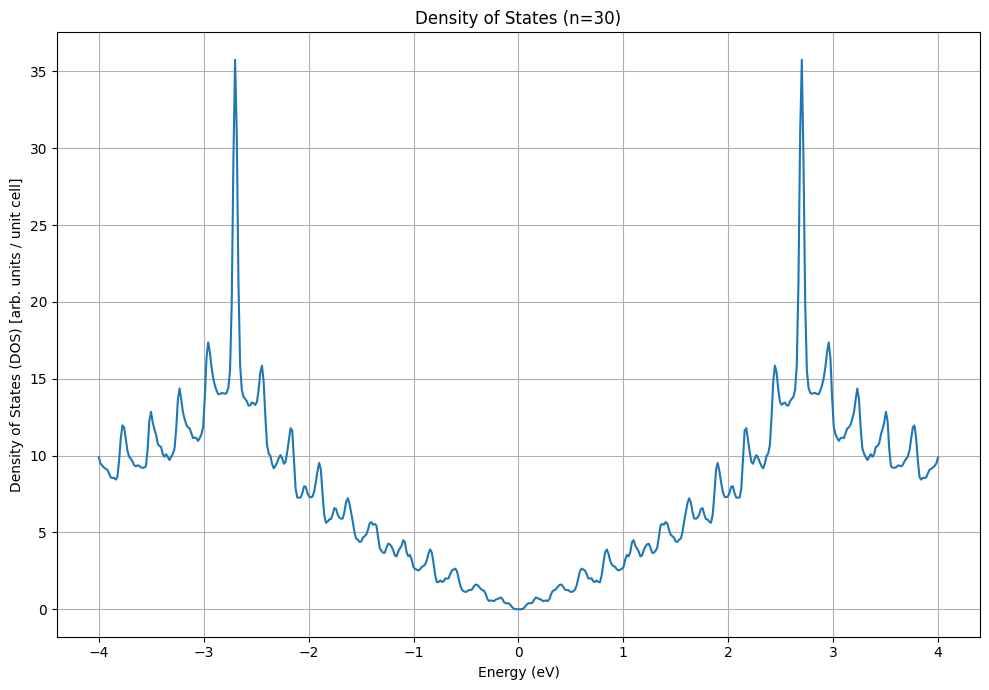

In [12]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
import time
import os
import multiprocessing as mp
from joblib import Parallel, delayed

# =============================================================================
# 1. Function to Create the Armchair Hamiltonian
# =============================================================================
def create_armchair_hamiltonian_direct(n, t):
    """
    Directly constructs the on-site (H) and coupling (T0) Hamiltonian matrices
    for an armchair graphene nanoribbon unit cell. This is a robust method.
    """
    num_atoms = 4 * n + 2
    H_rows, H_cols = [], []
    for i in range(num_atoms):
        neighbors = []
        # This logic defines the connectivity for the specific AGNR lattice
        if (i != 0 and i != 1 and i != 4 * n and i != (4*n + 1) and ((i-2) % 4) != 0 and (i - 3) % 4 != 0):
            if (i % 2 == 0): neighbors = [i - 1, i + 1, i + 3]
            else: neighbors = [i - 3, i + 1, i - 1]
        else:
            if (i == 0): neighbors = [1, 3]
            elif (i == 1): neighbors = [0, 2]
            elif (i == 4 * n): neighbors = [4*n + 1, 4 * n - 1]
            elif (i == 4 * n + 1): neighbors = [4 * n, 4 * n - 2]
            elif ((i - 2) % 4 == 0): neighbors = [i - 1, i + 3]
            elif ((i - 3) % 4 == 0): neighbors = [i - 3, i + 1]
            else: raise ValueError(f"Unhandled case for atom index: {i}")
        
        for neighbor in neighbors:
            if 0 <= neighbor < num_atoms:
                H_rows.append(i); H_cols.append(neighbor)

    H_data = np.full(len(H_rows), t, dtype=float)
    H = sp.coo_matrix((H_data, (H_rows, H_cols)), shape=(num_atoms, num_atoms)).tocsc()
    
    T0_rows = [4 * i - 2 for i in range(1, n + 1)]
    T0_cols = [4 * i - 1 for i in range(1, n + 1)]
    T0_data = np.full(n, t, dtype=float)
    T0 = sp.coo_matrix((T0_data, (T0_rows, T0_cols)), shape=(num_atoms, num_atoms)).tocsc()
    
    return H, T0

# =============================================================================
# 2. Main Execution Block
# =============================================================================
if __name__ == "__main__":
    # --- Parameters ---
    n = 30
    t = -2.7
    num_atoms = 4 * n + 2
    
    # Set environment variables for optimal performance with numerical libraries
    os.environ.setdefault("OMP_NUM_THREADS", "1")
    os.environ.setdefault("MKL_NUM_THREADS", "1")
    mp.set_start_method("spawn", force=True)

    # --- Create Hamiltonian ---
    H, T0 = create_armchair_hamiltonian_direct(n, t)

    # --- Define Eigenvalue Solver ---
    def get_eig(k):
        """Calculates energy eigenvalues for a given k-vector."""
        H_eff = H + T0 * np.exp(np.pi * k * 1j) + T0.conj().T * np.exp(-np.pi * k * 1j)
        energy = eigsh(H_eff, k=num_atoms-2, which='SA', return_eigenvectors=False)
        return sorted(energy)

    # --- Parallel Calculation of Band Structure ---
    Nk = 150
    k_vals = np.linspace(-1, 1, Nk, dtype=np.float64)
    
    print("Starting parallel calculation of eigenvalues...")
    t0 = time.perf_counter()
    
    # Use joblib to run the eigenvalue calculations in parallel
    results = Parallel(n_jobs=-1, prefer="processes", verbose=10)(
        delayed(get_eig)(k) for k in k_vals
    )
    
    wall = time.perf_counter() - t0
    print(f"\nEigenvalue sweep finished in {wall:.2f} s")

    # --- Process Results for Plotting ---
    # Stack the list of results into a single 2D NumPy array
    all_energies = np.array(results).T

    # --- Plot Band Structure ---
    plt.figure(figsize=(10, 7))
    for band_index in range(all_energies.shape[0]):
        plt.plot(k_vals, all_energies[band_index, :])
    plt.xlabel('k (momentum)')
    plt.ylabel('Energy (eV)')
    plt.ylim((-4, 4))
    plt.title(f'E-k Band Structure (n={n})')
    plt.grid(True)
    
    # --- Calculate and Plot Density of States (DOS) ---
    def get_dos_vec(energies, Nk, *, elow=-4, ehigh=4, broadening=0.02, npoints=500):
        """Calculates a smoothed DOS from a set of energy levels."""
        points = np.linspace(elow, ehigh, npoints, dtype=np.float64)
        # Use broadcasting to efficiently calculate Gaussian contributions
        z = (points[:, None] - energies[None, :]) / broadening
        pref = 1.0 / (np.sqrt(2.0*np.pi) * broadening)
        evaluated = np.sum(pref * np.exp(-0.5*z*z), axis=1)
        # CORRECTED: Normalize by the number of k-points for DOS per unit cell
        return points, evaluated / Nk

    # Flatten the 2D array of all energies into a 1D list for DOS calculation
    # Pass Nk to the function for correct normalization
    points, dos = get_dos_vec(all_energies.ravel(), Nk=Nk)
    print("DOS computed.")

    plt.figure(figsize=(10, 7))
    plt.plot(points, dos)
    plt.xlabel("Energy (eV)")
    plt.ylabel("Density of States (DOS) [arb. units / unit cell]")
    plt.title(f'Density of States (n={n})')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


# zg nano ribbon


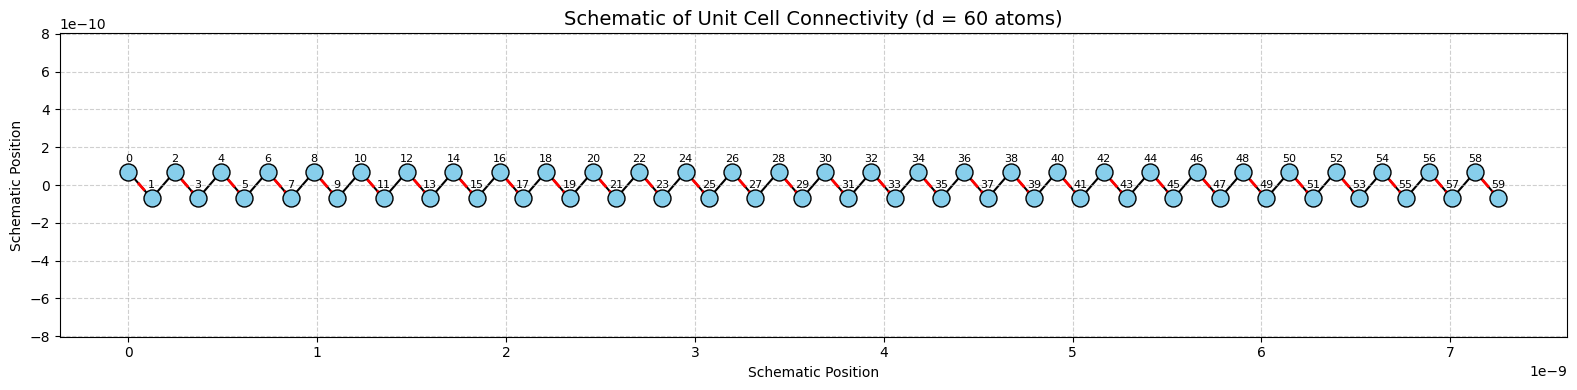

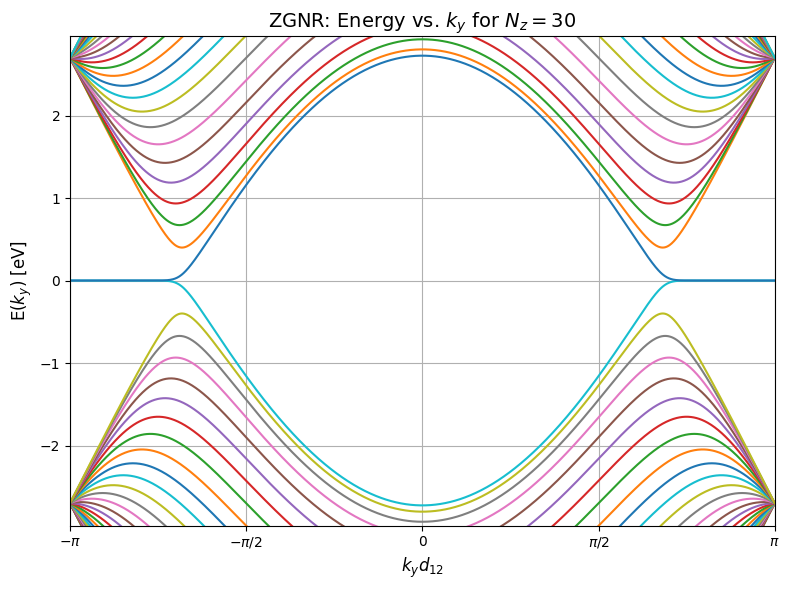

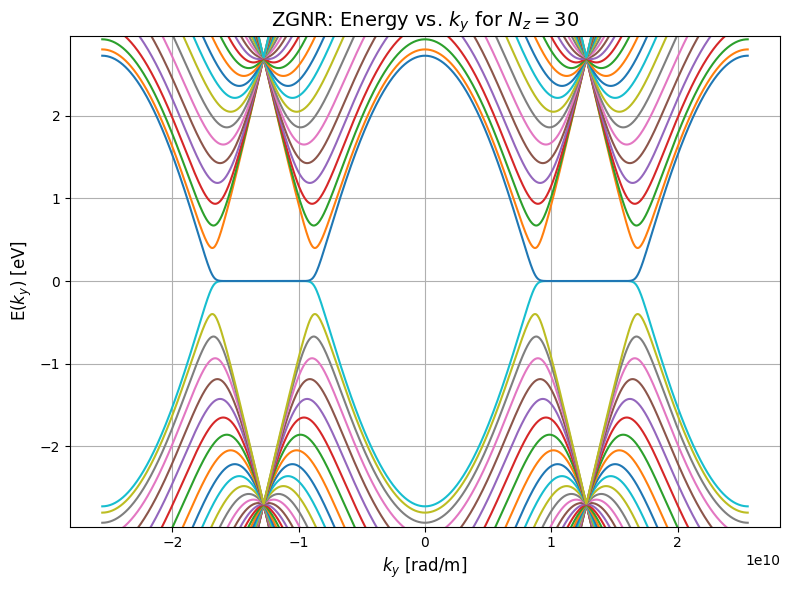

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy.linalg import eigh

# =============================================================================
# 1. Constants and Parameters
# These are equivalent to the initial definitions in the MATLAB script.
# =============================================================================
h_cut = 1.055e-34  # Reduced Planck's constant in J*s
eV = 1.602e-19     # Electron-volt in Joules
Armst = 1e-10      # Angstrom in meters

t_eV = 2.7         # Hopping energy in eV
a0_A0 = 1.42       # Carbon-carbon distance in Angstroms

t = t_eV * eV      # Hopping energy in Joules
a0 = a0_A0 * Armst # Carbon-carbon distance in meters
b = np.sqrt(3) * a0 / 2
d12 = 2 * b

# =============================================================================
# 2. Lattice Structure Setup
# This section builds the connectivity matrices (sn, tn) for the
# Zigzag Graphene Nanoribbon (ZGNR).
# NOTE: Python uses 0-based indexing, so all indices from MATLAB's 1-based
# system are reduced by 1.
# =============================================================================
nz = 30            # Number of zigzag chains
n = nz - 1
d = 4 + (n - 1) * 2 # Total number of atoms in the unit cell

# We use lists for efficient building and convert to NumPy arrays later.
sn_list = [[0, 1, 2], [1, 2, 3]]
tn_list = [[0, 3], [1, 2]]

# This loop builds the atom connections for the nanoribbon width
for m in range(2, n + 1):
    # Define the new atoms being added in this step (0-indexed)
    nm_start = 4 + (m - 2) * 2
    nm = np.arange(nm_start, nm_start + 2)
    
    # Define the connections for this new segment
    c1 = nm[0] - 1
    nc1 = [nm[0], c1]
    nc2 = [nm[1], nm[0]]
    
    # Append the new connections to the main lists
    sn_list[0].extend(nc1)
    sn_list[1].extend(nc2)
    tn_list[0].append(nm[1])
    tn_list[1].append(nm[0])

# Convert the lists to NumPy arrays for numerical operations
sn = np.array(sn_list)
tn = np.array(tn_list)

# =============================================================================
# 3. Visualize the Unit Cell Connectivity
# This section creates a schematic plot of the atoms in the unit cell and
# their connections as defined by the Hamiltonian.
# =============================================================================
def visualize_lattice(d_atoms, sn_arr, tn_arr, atom_dist, chain_dist):
    """
    Generates a plot of the unit cell's atomic connectivity.

    Args:
        d_atoms (int): Total number of atoms.
        sn_arr (np.array): Internal connections.
        tn_arr (np.array): Periodic connections.
        atom_dist (float): Base distance for placing atoms (e.g., a0).
        chain_dist (float): Base distance for placing atoms (e.g., b).
    """
    # Generate schematic coordinates for a 1D zigzag chain to display connectivity
    coords = np.zeros((d_atoms, 2))
    for i in range(d_atoms):
        coords[i, 0] = i * chain_dist  # x-position
        coords[i, 1] = (atom_dist / 2) * ((-1)**i)  # y-position for zigzag

    plt.figure(figsize=(16, 4))
    # Plot atoms as blue circles
    plt.scatter(coords[:, 0], coords[:, 1], s=150, c='skyblue', edgecolors='black', zorder=5)
    # Label atoms with their indices
    for i in range(d_atoms):
        plt.text(coords[i, 0], coords[i, 1] + 0.3 * atom_dist, str(i), 
                 ha='center', va='bottom', fontsize=8)

    # Plot internal bonds (sn) as solid black lines
    for i in range(sn_arr.shape[1]):
        p1_idx, p2_idx = sn_arr[:, i]
        x_coords = [coords[p1_idx, 0], coords[p2_idx, 0]]
        y_coords = [coords[p1_idx, 1], coords[p2_idx, 1]]
        plt.plot(x_coords, y_coords, 'k-', linewidth=1.5, zorder=1)

    # Plot periodic bonds (tn) as dashed red lines
    for i in range(tn_arr.shape[1]):
        p1_idx, p2_idx = tn_arr[:, i]
        x_coords = [coords[p1_idx, 0], coords[p2_idx, 0]]
        y_coords = [coords[p1_idx, 1], coords[p2_idx, 1]]
        plt.plot(x_coords, y_coords, 'r--', linewidth=2, zorder=2)
    
    plt.title(f'Schematic of Unit Cell Connectivity (d = {d_atoms} atoms)', fontsize=14)
    plt.xlabel('Schematic Position')
    plt.ylabel('Schematic Position')
    plt.axis('equal')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

# Call the visualization function
visualize_lattice(d, sn, tn, a0, b)


# =============================================================================
# 4. Function to Calculate Band Structure
# To avoid repeating code, this function calculates the energy bands for a
# given set of k-vectors.
# =============================================================================
def calculate_bands(kv, sn_arr, tn_arr, t_joule, d12_m, d_atoms):
    """
    Calculates the energy eigenvalues for a ZGNR.

    Args:
        kv (np.array): Array of k-vectors.
        sn_arr (np.array): Intrachain nearest-neighbor connections.
        tn_arr (np.array): Interchain nearest-neighbor connections.
        t_joule (float): Hopping parameter in Joules.
        d12_m (float): Periodic distance in meters.
        d_atoms (int): Total number of atoms in the unit cell.

    Returns:
        np.array: A matrix of energy eigenvalues (Ev) for each k-vector.
    """
    Ev = np.zeros((d_atoms, len(kv)))
    
    # Flatten the connection arrays once to build the sparse matrix efficiently
    # This corresponds to the i and j vectors in the MATLAB `sparse` command
    i_indices = np.concatenate((sn_arr[0, :], sn_arr[1, :], tn_arr[0, :], tn_arr[1, :]))
    j_indices = np.concatenate((sn_arr[1, :], sn_arr[0, :], tn_arr[1, :], tn_arr[0, :]))
    
    # Pre-calculate the static part of the values vector 'v'
    v_static = np.repeat(-t_joule, 2 * sn_arr.shape[1])

    for m, k in enumerate(kv):
        # Calculate the k-dependent part of 'v' for the periodic boundary
        v_k_dependent_1 = np.repeat(-t_joule * np.exp(1j * k * d12_m), tn_arr.shape[1])
        v_k_dependent_2 = np.repeat(-t_joule * np.exp(-1j * k * d12_m), tn_arr.shape[1])
        v = np.concatenate((v_static, v_k_dependent_1, v_k_dependent_2))
        
        # Construct the sparse Hamiltonian matrix
        # csc_matrix is a good format for efficient matrix operations
        hk = csc_matrix((v, (i_indices, j_indices)), shape=(d_atoms, d_atoms))
        
        # Calculate eigenvalues. eigh is used for Hermitian matrices like the
        # Hamiltonian. It's faster and returns sorted, real eigenvalues.
        # .toarray() is equivalent to MATLAB's full()
        egv = eigh(hk.toarray(), eigvals_only=True)
        Ev[:, m] = egv
        
    return Ev

# =============================================================================
# 5. First Calculation and Plot
# =============================================================================
res = 1000
kv1 = np.linspace(-np.pi / d12, np.pi / d12, res)
Ev1 = calculate_bands(kv1, sn, tn, t, d12, d)

plt.figure(figsize=(8, 6))
# Corrected plotting by transposing the energy matrix Ev1.
# Removed the color 'b' to allow Matplotlib to auto-color the bands.
plt.plot(kv1 * d12, (Ev1 / eV).T, linewidth=1.5)
plt.xlabel(r'$k_y d_{12}$', fontsize=12)
plt.ylabel('E($k_y$) [eV]', fontsize=12)
plt.title(f'ZGNR: Energy vs. $k_y$ for $N_z={nz}$', fontsize=14)
plt.xticks(
    ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
    labels=[r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$']
)
plt.xlim(-np.pi, np.pi)
plt.ylim(-t_eV * 1.1, t_eV * 1.1) # Set y-limits for better visualization
plt.grid(True)
plt.tight_layout()

# =============================================================================
# 6. Second Calculation and Plot
# =============================================================================
kv2 = np.linspace(-np.pi / b, np.pi / b, res)
Ev2 = calculate_bands(kv2, sn, tn, t, d12, d)

plt.figure(figsize=(8, 6))
# Corrected plotting by transposing the energy matrix Ev2.
# Removed the color 'b' to allow Matplotlib to auto-color the bands.
plt.plot(kv2, (Ev2 / eV).T, linewidth=1.5)
plt.xlabel(r'$k_y$ [rad/m]', fontsize=12)
plt.ylabel('E($k_y$) [eV]', fontsize=12)
plt.title(f'ZGNR: Energy vs. $k_y$ for $N_z={nz}$', fontsize=14)
plt.ylim(-t_eV * 1.1, t_eV * 1.1) # Set y-limits for better visualization
plt.grid(True)
plt.tight_layout()


# =============================================================================
# 7. Show Plots
# =============================================================================
plt.show()
